<a href="https://colab.research.google.com/github/HenryVRosas/Evidencia_ia/blob/main/7_back_porpagation_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabajo

Adecuar el documento, y procesar el dataset de titanic

In [ ]:
# Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# cargar el dataset como un dataframe
data = pd.read_csv("titanic.csv")  # Cambio de "student_data.csv" a "titanic.csv"
data[:5]  # Muestra los primeros 5 datos


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


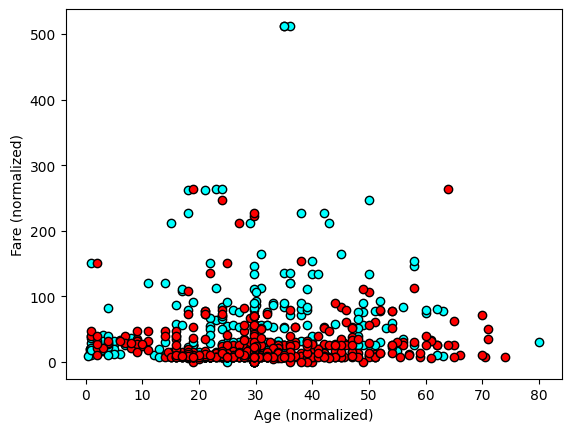

In [ ]:
# Plotear los datos
def plot_points(data):
    """Función para plotear los puntos de datos de supervivencia basado en 'Age' y 'Fare'."""
    X = np.array(data[["Age", "Fare"]])
    y = np.array(data["Survived"])
    survived = X[y == 1]
    not_survived = X[y == 0]
    plt.scatter(survived[:, 0], survived[:, 1], color='cyan', edgecolor='k', label='Survived')
    plt.scatter(not_survived[:, 0], not_survived[:, 1], color='red', edgecolor='k', label='Not Survived')
    plt.xlabel("Age (normalized)")
    plt.ylabel("Fare (normalized)")

plot_points(data)
plt.show()


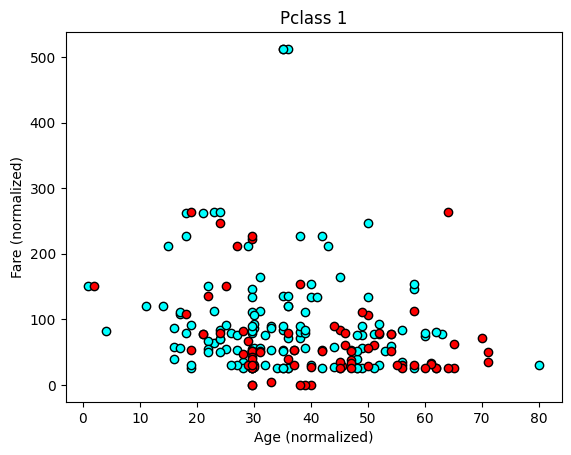

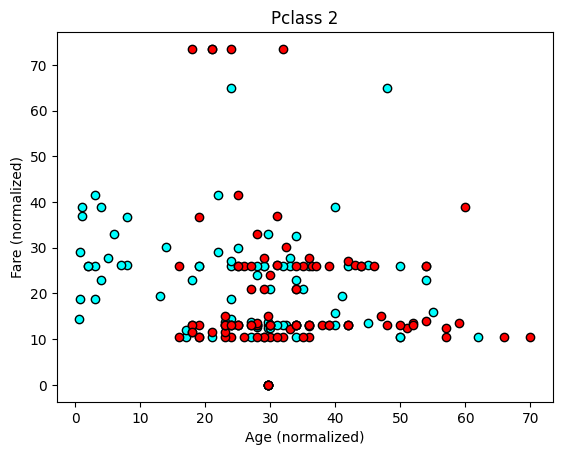

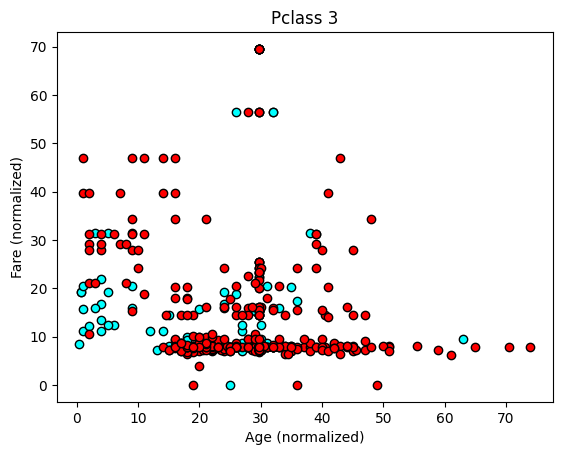

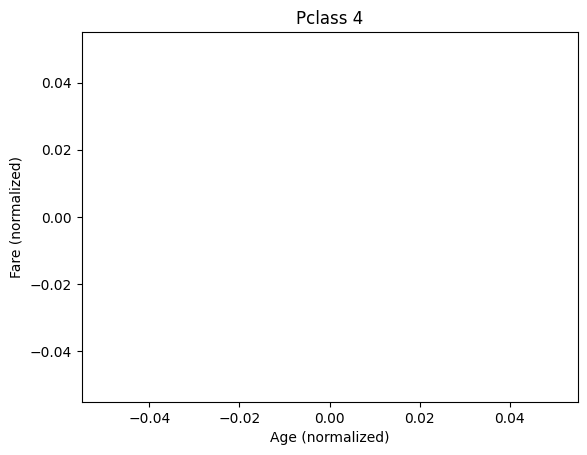

In [ ]:
# Separar por Pclass
data_rank1 = data[data["Pclass"] == 1]
data_rank2 = data[data["Pclass"] == 2]
data_rank3 = data[data["Pclass"] == 3]
data_rank4 = data[data["Pclass"] == 4]

# Plotear los grupos por clase
plot_points(data_rank1)
plt.title("Pclass 1")
plt.show()
plot_points(data_rank2)
plt.title("Pclass 2")
plt.show()
plot_points(data_rank3)
plt.title("Pclass 3")
plt.show()
plot_points(data_rank4)
plt.title("Pclass 4")
plt.show()


In [ ]:
# Aplicar one hot encoding y unir con columnas relevantes, se borro columna Pclass
data_encoded = pd.concat([data[['Survived', 'Age', 'Fare']], pd.get_dummies(data['Pclass'], prefix='Pclass')], axis=1)
for column in data_encoded.columns:
    data_encoded[column] = pd.to_numeric(data_encoded[column], errors='coerce').astype(np.float64)
data_encoded.dropna(inplace=True)
data_encoded

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.000000,7.2500,0.0,0.0,1.0
1,1.0,38.000000,71.2833,1.0,0.0,0.0
2,1.0,26.000000,7.9250,0.0,0.0,1.0
3,1.0,35.000000,53.1000,1.0,0.0,0.0
4,0.0,35.000000,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...
886,0.0,27.000000,13.0000,0.0,1.0,0.0
887,1.0,19.000000,30.0000,1.0,0.0,0.0
888,0.0,29.699118,23.4500,0.0,0.0,1.0
889,1.0,26.000000,30.0000,1.0,0.0,0.0


In [ ]:
# Normalización y Escalamiento de 'Age' y 'Fare'
data_encoded['Age'] = data_encoded['Age'] / data_encoded['Age'].max()
data_encoded['Fare'] = data_encoded['Fare'] / data_encoded['Fare'].max()
data_encoded

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.275000,0.014151,0.0,0.0,1.0
1,1.0,0.475000,0.139136,1.0,0.0,0.0
2,1.0,0.325000,0.015469,0.0,0.0,1.0
3,1.0,0.437500,0.103644,1.0,0.0,0.0
4,0.0,0.437500,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...
886,0.0,0.337500,0.025374,0.0,1.0,0.0
887,1.0,0.237500,0.058556,1.0,0.0,0.0
888,0.0,0.371239,0.045771,0.0,0.0,1.0
889,1.0,0.325000,0.058556,1.0,0.0,0.0


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba es mejor que la 90 y 10
#Dividir la data entre x e y con train test split es mejor
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop('Survived', axis=1), data_encoded['Survived'], test_size=0.2, random_state=42)


In [ ]:
# Red neuronal
# Funciones
def sigmoid(x):
    """Aplica la función sigmoidal para activación."""
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    """Derivada de la función sigmoidal."""
    return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
# Defino la red neuronal

epochs = 600
learnrate = 0.5

# Entrenamiento de la red, esta agregado backpropagation

def train_nn(features, targets, epochs, learnrate):
    """Entrena la red neuronal y muestra la pérdida en cada época."""
    np.random.seed(42)
    n_records, n_features = features.shape
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            output = sigmoid(np.dot(x, weights))
            error = -y * np.log(output) - (1 - y) * np.log(1 - output)
            error_term = (y - output) * sigmoid_prime(x)
            del_w += error_term * x
        weights += learnrate * del_w / n_records
        if e % (epochs / 10) == 0 or e == epochs - 1:
            predictions = sigmoid(np.dot(features, weights))
            loss = np.mean((predictions - targets) ** 2)
            print(f"Epoch {e + 1}, Loss: {loss}")

    print("=========")
    print("Finished training!")
    return weights


In [ ]:
# Entrenar el modelo y mostrar los pesos obtenidos
weights = train_nn(X_train, y_train, epochs, learnrate)

Epoch 1, Loss: 0.25345458436520774
Epoch 61, Loss: 0.21760579870145136
Epoch 121, Loss: 0.21080200411124195
Epoch 181, Loss: 0.2087781618592495
Epoch 241, Loss: 0.20789352706472294
Epoch 301, Loss: 0.20738343880908308
Epoch 361, Loss: 0.2070294288048481
Epoch 421, Loss: 0.20675181259775846
Epoch 481, Loss: 0.20651611089468666
Epoch 541, Loss: 0.20630577359775498
Epoch 600, Loss: 0.2061154749653572
Finished training!


In [ ]:
# Imprimo el ultimo peso obtenido
weights

array([-0.7635315 ,  0.22320192,  0.69190107,  0.18817885, -0.92212221])

In [ ]:
# Evaluar la precisión del modelo

def calculate_accuracy(features, targets, weights):
    outputs = sigmoid(np.dot(features, weights))
    predictions = outputs > 0.5
    return np.mean(predictions == targets)

# Calcular y mostrar la precisión
training_accuracy = calculate_accuracy(X_train, y_train, weights)
testing_accuracy = calculate_accuracy(X_test, y_test, weights)
#print("Training Accuracy: {:.3f}".format(training_accuracy))
#print("Testing Accuracy: {:.3f}".format(testing_accuracy))

# Si deseas utilizar la variable 'accuracy' específicamente para la precisión de prueba y luego imprimir
accuracy = testing_accuracy
print("Prediction accuracy: {:.3f}".format(accuracy))


Prediction accuracy: 0.721
